In [1]:
import main
import numpy as np
import matplotlib.pyplot as plt
import peakutils

../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened
1
2


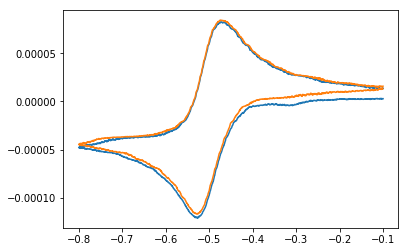

In [2]:
dict_1,n_cycle = main.read_file('../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
for i in range(n_cycle):
        print(i+1)
        df = main.data_frame(dict_1, i+1)
        plt.plot(df.Potential, df.Current, label = "Cycle{}".format(i+1))


In [3]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
main.peak_currents(df,[838],'Current')

array([-0.0001184])

In [4]:
for i in range(n_cycle-1):
    i = i+1
    df = main.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
  
    peak_index = main.peak_detection(y)
    
    x1,x2 = main.split(x)
    y1,y2 = main.split(y)
    y_base1 = main.linear_background(x1,y1)
    y_base2 = main.linear_background(x2,y2)
    
   

In [70]:
index_list = []
peak_top = peakutils.indexes(y2, thres=0.99, min_dist=0.001)
peak_bottom = peakutils.indexes(abs(y1), thres=0.99, min_dist=0.001)
print(peak_top)
length = len(peak_top)
print(length)
val = length/2
print(peak_top[int(val)])
print(peak_bottom)
length2 = len(peak_bottom)
print(length2)
val2 = length2/2
print(peak_bottom[int(length2/2)])
#np.median(peak)
#index_list.append([peak, peak2])
#index_list


[650 652 655 657 660 662 665 667 670 673]
10
662
[849 851 853 856 858 863 865]
7
856


In [74]:
def peak_detection(data_y):
    
    index_list = []
    
    col_y1, col_y2 = split_column(data_y)
    
    peak_top = peakutils.indexes(col_y2, thres=0.99, min_dist=0.001)
    peak_bottom = peakutils.indexes(abs(col_y1), thres=0.99, min_dist=0.001)
    
    len_top = len(peak_top)
    len_bottom = len(peak_bottom)
    
    index_list.append([peak_top[int(len_top/2)], peak_bottom[int(len_bottom/2)]])
    return index_list

[[781, 2]]
(2801,)


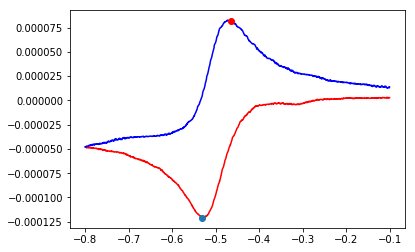

In [67]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
peak_index = main.peak_detection(y)
print(peak_index)
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x1[863],y1[863],marker='o')
plt.plot(x2[670],y2[670],marker='o',color = 'red')

print(x.shape)

In [24]:
main.critical_idx(x1,y1)

60

In [25]:
main.critical_idx(x2,y2)

1